**Classificação pelo método voting**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [3]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


Vemos que com os resultados das classificações dos diversos testes agregados, a acurácia do VotingClassifier ficou maior se comparada com a dos testes individualmente. Este tipo classificador ensemble funciona da seguinte forma, diferentes tipos de algoritmos de machine learning são treinados individualmente. Para fazer a previsão, todos eles serão usados a partir do seu próprio resultado de teste, em seguida são compados os seus resultados, a classe que obteve o maior número de previsões será a escolhida como resultado da previsão do VotingClassifier. Isso porque especificamos o método **hard**

In [4]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [5]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


Outra maneira que podemos usar o VotingClassifier, além da rígida(hard), é substituindo-o por **soft**. Desta maneira a escolha pela classe prevista é a partir da que tiver a maior probabilidade média entre todos os classificadores individuais. Ele consegue um desempenho maior que o **hard**, pois da mais peso para votos mais confiantes. O problema deste classificador é que os modelos usados precisam ter o método **predict_proba()** que tem a saída das probalidade das classes estarem certas.

No caso do SVM, ele não possui o método específico, porém se marcado como **probability=True**, ele faz com que SVC use validação cruzada para fazer a probabilidade das classes.

**Bagging e Pasting**

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

In [7]:
print(bag_clf)
print("Accuracy = ", accuracy_score(y_test, y_pred))

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)
Accuracy =  0.92


No código em questão foram usadas 500 Árvores de decisão, o tamanho das amostras é 100, n_jobs=-1 diz que todos os núcleos disponíveis da CPU serão usados.

O parâmetro bootstrap informa se o ensemble será bagging ou pasting, caso seja bagging, bootstrap será **True** dizendo ao modelo que haverá reposição das intâncias já usadas. Quando bootstrap=**False**, informa que não haverá reposição das instâncias.

In [8]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

In [9]:
print(bag_clf)
print("Accuracy = ", accuracy_score(y_test, y_pred))

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=100, n_estimators=500, n_jobs=-1)
Accuracy =  0.904


In [10]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [11]:
bag_clf.oob_score_

0.9013333333333333

In [12]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

Como Bagging utiliza instâncias de forma aleatória, algumas instâncias podem ser usadas mais de uma vez, enquanto outras não serão usadas. Com isso em vez de usar uma validação cruzada para avaliar o modelo, podemos utilizar o parâmetro oob_score=True, onde o modelo usará essas instâncias não utilizadas para fazer uma autoavaliação. No exemplo em questão a sua autoavaliação deu aproximadamente 90%, enquanto o modelo com o teste dá 92%, sendo assim podemos dizer com o modelo está com uma boa generalização.

**Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [14]:
y_pred_rf = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))

0.904


Conhecendo a importância das features

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10100810898188545
sepal width (cm) 0.025273903073100196
petal length (cm) 0.43513483076453224
petal width (cm) 0.4385831571804821


Podemos ver a partir do método **feature_importances_** que as features com mais peso para as decisões são: **tamanho da pétala** e  **largura da pétala**.

**Boosting**

**AdaBoost**

In [16]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(X_train, y_train)

/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [17]:
from matplotlib.colors import ListedColormap
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)


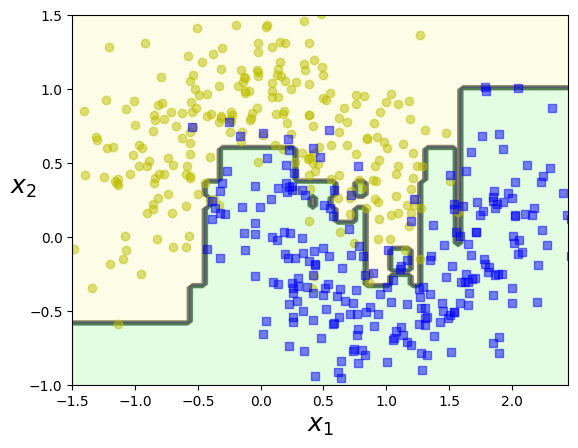

In [18]:
plot_decision_boundary(ada_clf, X, y)

In [19]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=1)

ada_clf.fit(X_train, y_train)

/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=100)

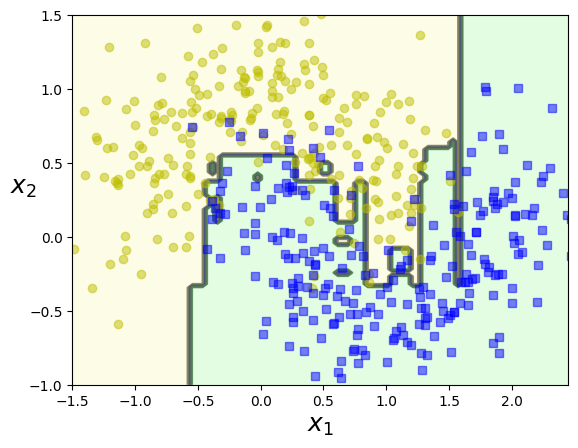

In [20]:
plot_decision_boundary(ada_clf, X, y)

In [21]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(X_train, y_train)

/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=100)

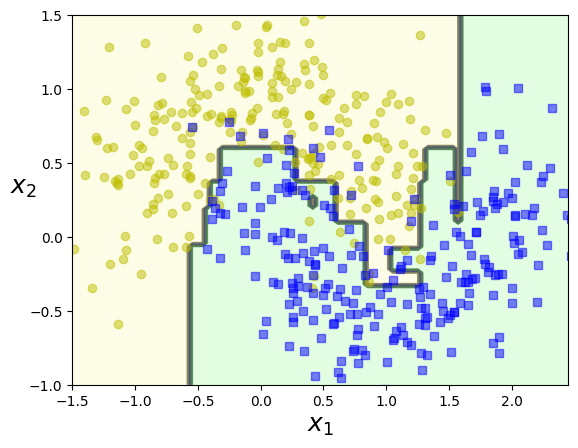

In [22]:
plot_decision_boundary(ada_clf, X, y)

In [23]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=500,
    algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(X_train, y_train)

/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=500)

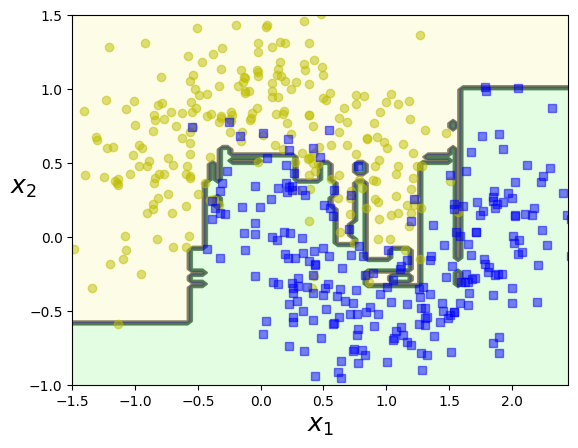

In [24]:
plot_decision_boundary(ada_clf, X, y)

**GradientBoosting**

In [25]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

Treinando um segundo regressor com os erros residuais do primeiro

In [27]:
y2 = y - tree_reg1.predict(X)

tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)


DecisionTreeRegressor(max_depth=2)

Treinando um terceiro regressor com os erros residuais do segundo

In [28]:
y3 = y2 - tree_reg2.predict(X)

tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

Criamos um ensemble e podemos fazer predições com ele

In [29]:
X_new = np.array([[0.8]])

In [30]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [31]:
y_pred

array([0.75026781])

Criando o mesmo ensemble com a classe GradientBoostingRegressor

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [33]:
gbrt.predict(X_new)

array([0.75026781])

**Usando o staged_predict() para encontrar o número ótimo de árvores**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

In [35]:
errors

[0.04853645651402395,
 0.040640268941000264,
 0.034251627375732265,
 0.030860253423403018,
 0.026963941731481037,
 0.023139718761101085,
 0.02118892032500619,
 0.018172837139291655,
 0.01658469511059632,
 0.014568427284013214,
 0.012919592933029175,
 0.012030899023042343,
 0.011188765359382204,
 0.010390290551727637,
 0.009306394142702906,
 0.00830459415632203,
 0.007626346083680286,
 0.007373861189333121,
 0.007136295600513196,
 0.006741763823569835,
 0.006102481400713888,
 0.005690836404214948,
 0.005291986768518243,
 0.005172467397888522,
 0.004935572194959045,
 0.004746297700031881,
 0.0044323394223554375,
 0.004244265295864291,
 0.0040111971146731635,
 0.003954394710620797,
 0.003879733231164774,
 0.0037918509916983934,
 0.0037034180984788813,
 0.0035410961960233396,
 0.003497527610255329,
 0.0033465574270547544,
 0.0032133362689326134,
 0.0031668820700545526,
 0.0031474880551944522,
 0.00313290434626548,
 0.003060384155496198,
 0.0030517634820494016,
 0.003041398686667091,
 0.002

In [36]:
bst_n_estimators = np.argmin(errors) + 1 #pega o indice + 1 do menor valor em errors
bst_n_estimators

85

O número de árvores com o menor erro quadrático médio: 85

In [37]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=85)

Neste caso foi usado o conceito de **early stopping**, consiste em parar a árvore de crescer antes que o número de erros comece a aumentar, ou seja, para o crescimento da árvore antes que ela comece a entrar em **overfitting**. No problema em quastão não estamos lidando com o tamanho da árvore, mas sim com o número de árvores presentes no ensemble.

Aplicando o **warm_start** para que não seja preciso treinar um monte de árvores para depois encontrar a melhor.

In [38]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_errors = mean_squared_error(y_val, y_pred)
    if val_errors < min_val_error:
        min_val_error = val_errors
        error_goin_up = 0
    else:
        error_goin_up += 1
        if error_goin_up == 5:
            print(n_estimators)
            break #early stopping

69


**Extreme Gradient Boosting**

In [39]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred = xgb_reg.predict(X_val)